# Problem

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Read the data as an appropriate Time Series data and plot the data

In [2]:
df = pd.read_csv('Sparkling.csv',parse_dates=True)
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


The dataset contents 187 observations in total.

#### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [4]:
dates = pd.date_range(start='1980-01',end='1995-08', freq='M')
dates

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

We have created and saved our date time index as above

In [5]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(dates)
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [6]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [7]:
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


We do not require the column of "YearMonth" as we have created a Time Stamp for the same and made it as our index column as well. Hence, we have dropped "YearMonth" from our dataset.

In [8]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


We observe from a historical record of 187 months since Jan 1980 until July 1995 that average sales over the period of Sparkling wine was 2402 bottles. The least being 1070 bottles and highest being 7242 bottles. Now, we have our data ready for the Time Series Analysis.

#### Plot the Time Series to understand the behaviour of the data.

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

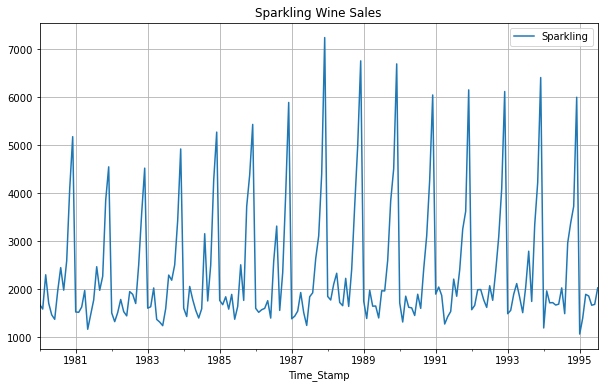

In [10]:
df.plot()
plt.title('Sparkling Wine Sales')
plt.grid();

For above figure, we observe presence of seasonality throughout the time series. However, there is presence of trend as well at various time frames for eg; we see an uptrend from the year 1983 until 1987 and then from 1987 until 1991 it has reversed into a downtrend. From 1991 until the end of the time series, the trend is somewhat static with no major changes observed in the sales figures of the Sparkling Wine.

# 1.1 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Yearly Boxplot

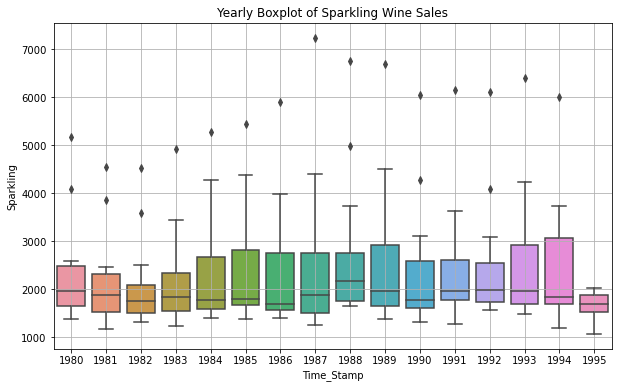

In [11]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.title('Yearly Boxplot of Sparkling Wine Sales')
plt.grid();

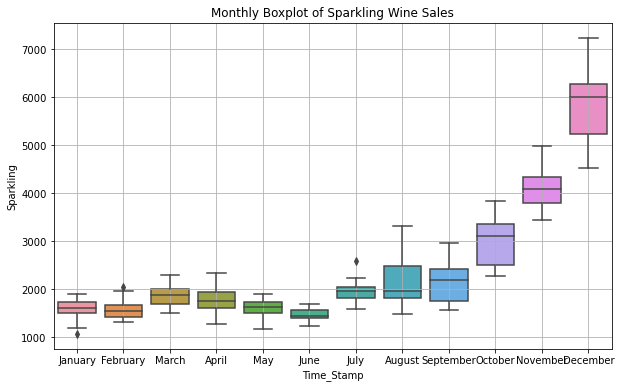

In [12]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.title('Monthly Boxplot of Sparkling Wine Sales')
plt.grid();

#### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

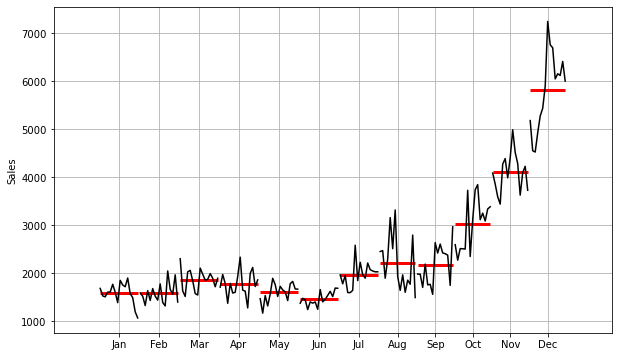

In [13]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

#### Plot a graph of monthly sales across years

In [14]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


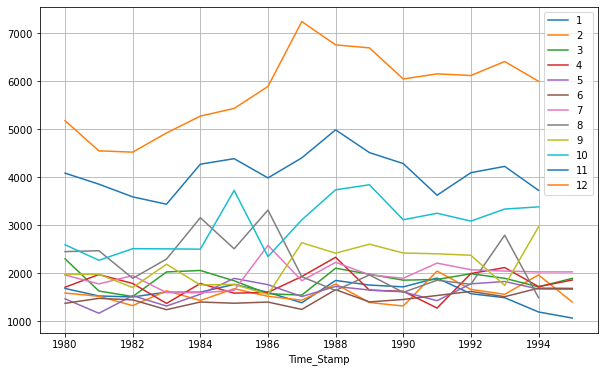

In [15]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution

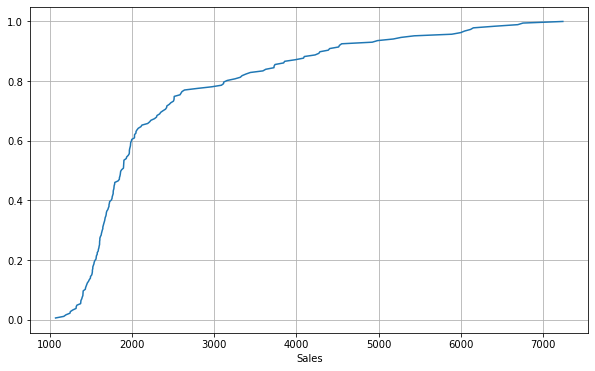

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure()
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average Sales per month and the month on month percentage change of Sales.

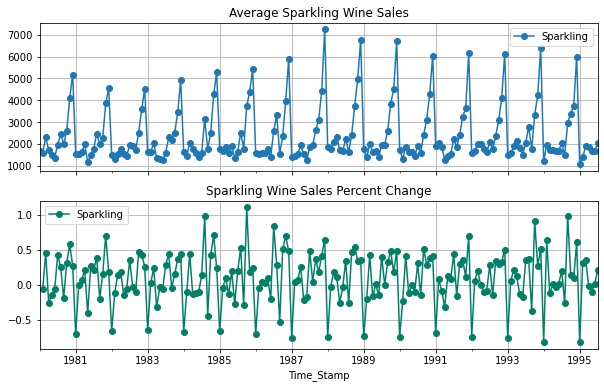

In [17]:
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True)

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Wine Sales Percent Change",grid=True)

#### Let us try to resample or aggregate the Time Series from an annual perspective, sum up the observations of each month and also look at the mean of the observations of each month.

In [18]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum

,Sparkling
Time_Stamp,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431
1985-12-31,29640
1986-12-31,29170
1987-12-31,30258
1988-12-31,33246


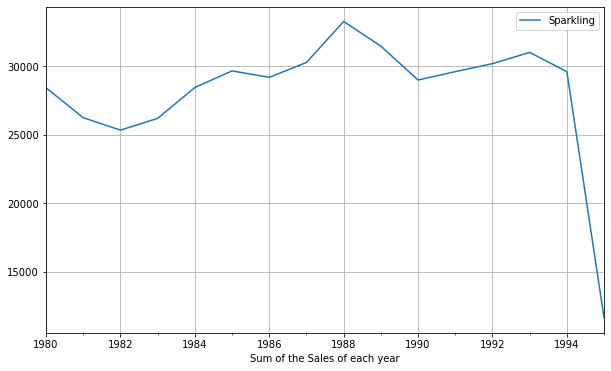

In [19]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Sales of each year');

In [20]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean

,Sparkling
Time_Stamp,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000
1985-12-31,2470.000000
1986-12-31,2430.833333
1987-12-31,2521.500000
1988-12-31,2770.500000


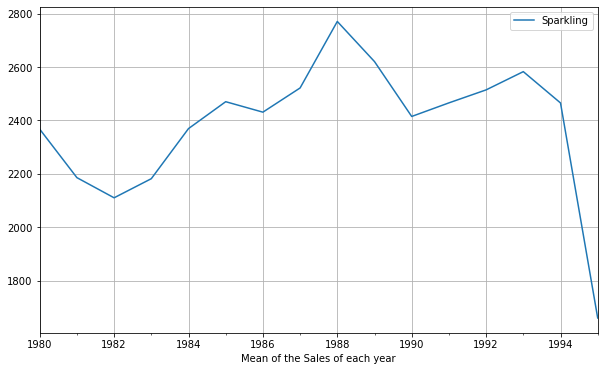

In [21]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Sales of each year');

#### Decomposing the Time Series: Additive Method

In [22]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

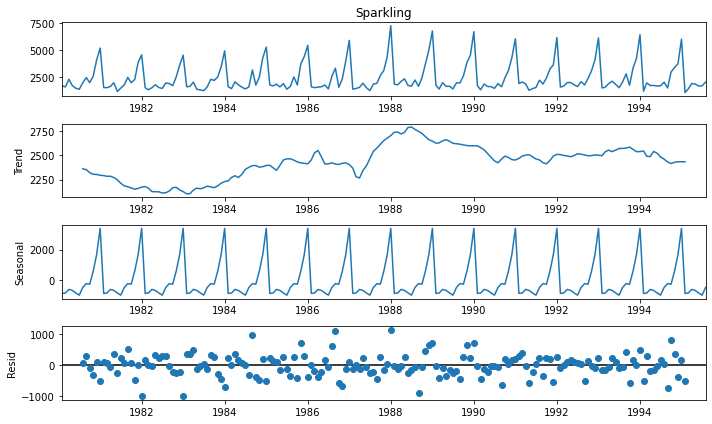

In [23]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [25]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

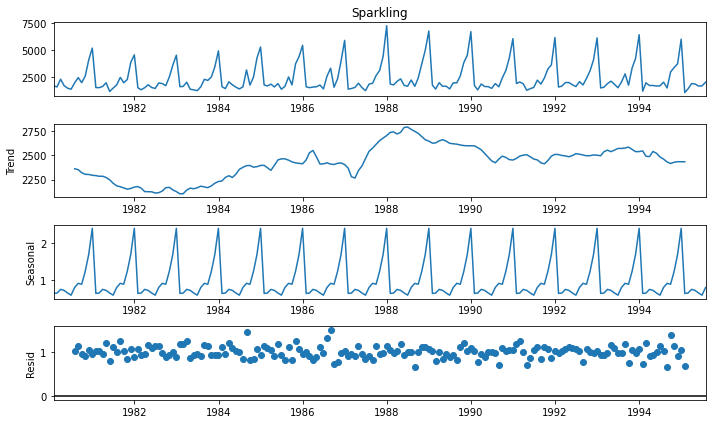

In [26]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [27]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

# 1.2 Split the data into training and test. The test data should start in 1991

#### Splitting Training and Test dataset

In [28]:
train=df[df.index<'1991']
test=df[df.index>='1991']

In [29]:
print('Training Data Shape ',train.shape)
print('Testing Data Shape ',test.shape)

Training Data Shape  (132, 1)
Testing Data Shape  (55, 1)


In [30]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



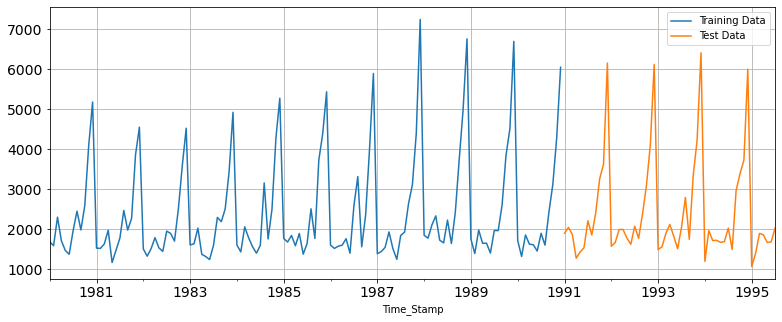

In [31]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 1.3 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

## Linear Regression Model (LR)

In [32]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [33]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [34]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

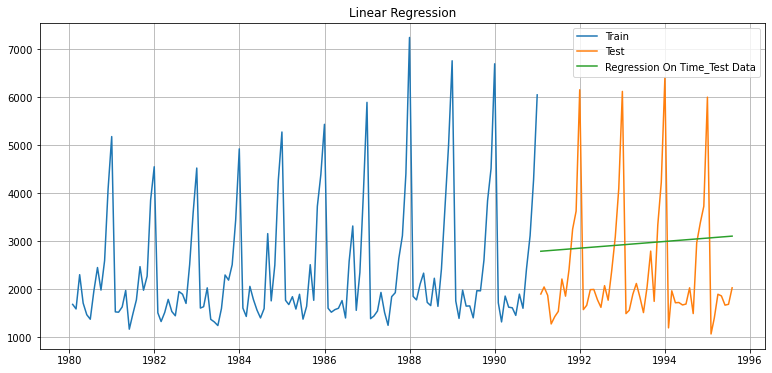

In [36]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title("Linear Regression")
plt.grid();

#### LR Model Evaluation

In [37]:
from sklearn import metrics

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


## Naive Model: $\hat{y}_{t+1} = y_t$

In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

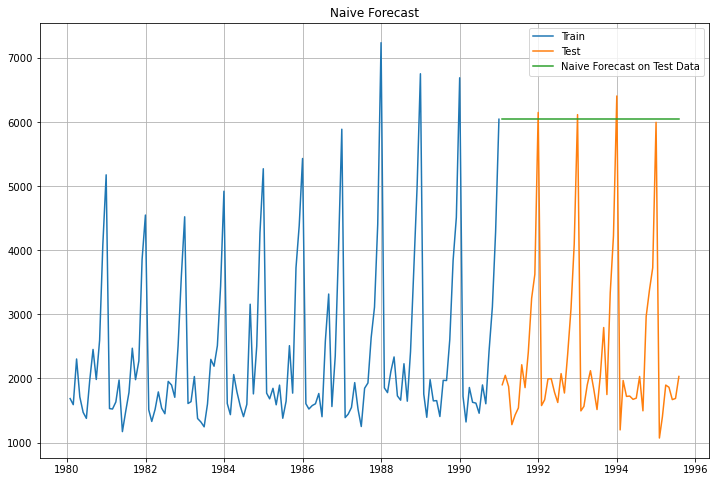

In [41]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Naive Model Evaluation

In [42]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [43]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf_2

,Test RMSE
NaiveModel,3864.279352


## Simple Average Model

In [44]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [45]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


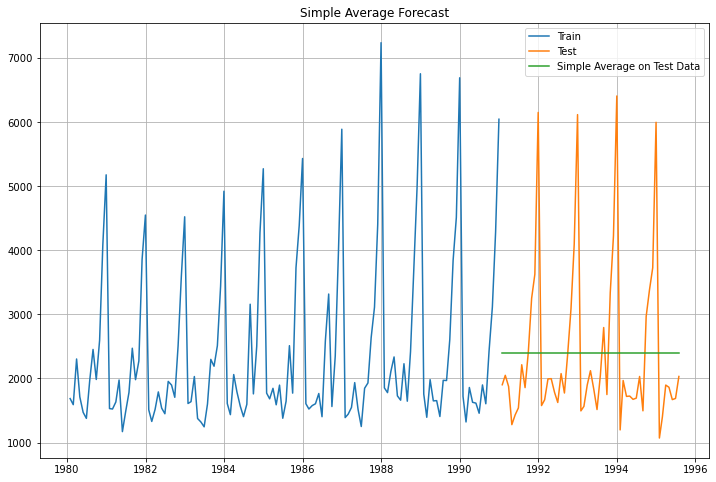

In [46]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Simple Average Model Evaluation

In [47]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [48]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf_3

,Test RMSE
SimpleAverageModel,1275.081804


## Moving Average (MA)

In [49]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


#### Trailing moving averages

In [50]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Sparkling'].rolling(12).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9,Trailing_12
Time_Stamp,,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN,NaN


In [51]:
MovingAverage.tail()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9,Trailing_12
Time_Stamp,,,,,,
1995-03-31,1897,1649.5,2592.00,2913.666667,2664.000000,2422.333333
1995-04-30,1862,1879.5,1557.75,2659.833333,2645.222222,2433.750000
1995-05-31,1670,1766.0,1707.75,2316.666667,2664.666667,2433.416667
1995-06-30,1688,1679.0,1779.25,1598.166667,2522.444444,2433.000000
1995-07-31,2031,1859.5,1812.75,1758.333333,2372.000000,2433.000000


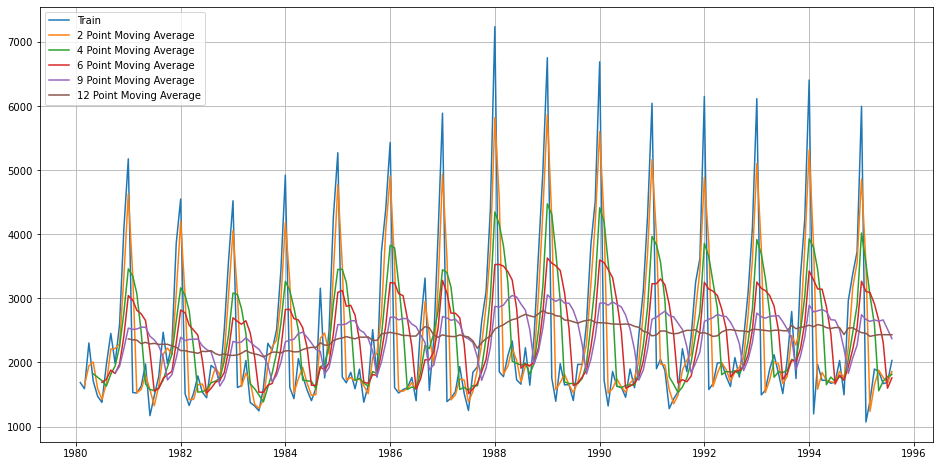

In [52]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [53]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index <'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >='1991']

In [54]:
print('Trailing Moving Average Train Data Shape ',trailing_MovingAverage_train.shape)
print('Testing Moving Average Train Data Shape ',trailing_MovingAverage_test.shape)

Trailing Moving Average Train Data Shape  (132, 6)
Testing Moving Average Train Data Shape  (55, 6)


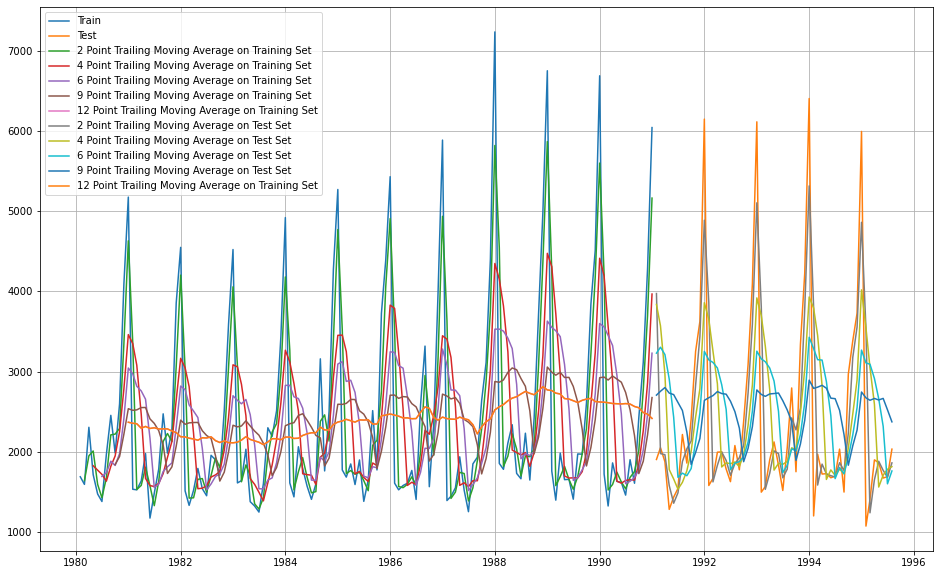

In [55]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,10))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_12'],label = '12 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_train['Trailing_12'],label = '12 Point Trailing Moving Average on Training Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

##### Done only on the test data.

In [56]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

## Test Data - RMSE  --> 12 point Trailing MA

rmse_model5_test_12 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model5_test_12))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 
For 12 point Moving Average Model forecast on the Training Data,  RMSE is 1267.925 


In [57]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9, rmse_model5_test_12]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf_4

,Test RMSE
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330


#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

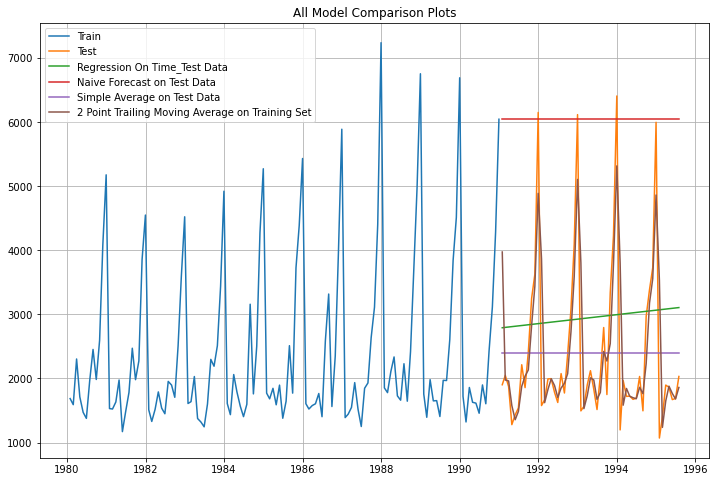

In [58]:
## Plotting on both Training and Test data

plt.figure(figsize=(12,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("All Model Comparison Plots")
plt.grid();

## Simple Exponential Smoothing

In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [60]:
SES_train = train.copy()
SES_test = test.copy()

In [61]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [62]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [63]:
model_SES_autofit.params

{'smoothing_level': 0.049606598807459476,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435326,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.929339
1991-02-28,2049,2724.929339
1991-03-31,1874,2724.929339
1991-04-30,1279,2724.929339
1991-05-31,1432,2724.929339


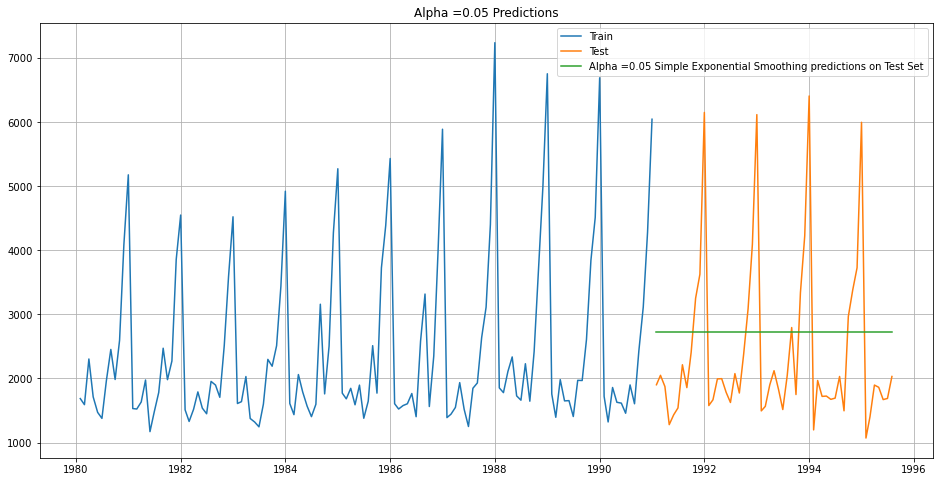

In [65]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.05 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.05 Predictions');

#### Model Evaluation Simple Exponential Smoothing

In [66]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [67]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.05,SimpleExponentialSmoothing'])

resultsDf_5

,Test RMSE
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674


## Double Exponential Smoothing (Holts Model)
#### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [68]:
DES_train = train.copy()
DES_test = test.copy()

In [69]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [70]:
model_DES_autofit = model_DES.fit(optimized=True)

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [72]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,5221.278699
1991-02-28,2049,5127.886554
1991-03-31,1874,5034.494409
1991-04-30,1279,4941.102264
1991-05-31,1432,4847.710119


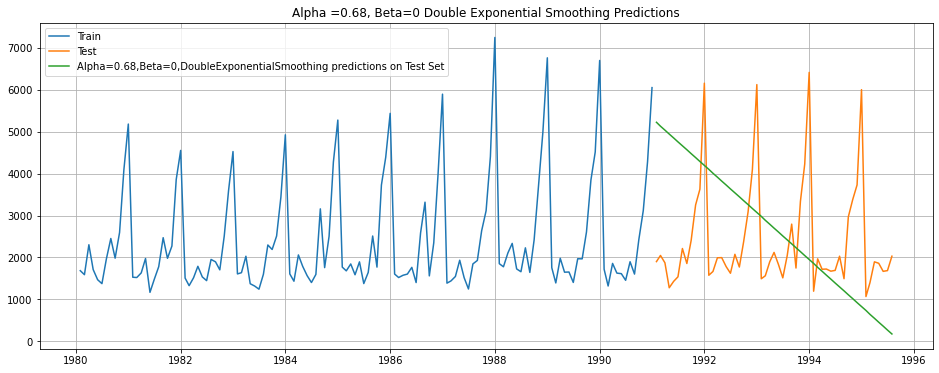

In [75]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,6))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.68,Beta=0,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.68, Beta=0 Double Exponential Smoothing Predictions');

#### Model Evaluation Double Exponential Smoothing

In [76]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.68, Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))


For Alpha =0.68, Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [77]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['For Alpha =0.68, Beta = 0 DoubleExponentialSmoothing'])

resultsDf_6

,Test RMSE
"For Alpha =0.68, Beta = 0 DoubleExponentialSmoothing",2007.238526


## Triple Exponential Smoothing (Holt - Winter's Model) - Additive

#### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [82]:
TES_train = train.copy()
TES_test = test.copy()

In [83]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',freq='M')

In [84]:
model_TES_autofit = model_TES.fit()

In [85]:
model_TES_autofit.params

{'smoothing_level': 0.09992494061350383,
 'smoothing_trend': 0.01000873106420731,
 'smoothing_seasonal': 0.5100437167880981,
 'damping_trend': nan,
 'initial_level': 2364.6331703223286,
 'initial_trend': -0.08061603334188022,
 'initial_seasons': array([-653.72900791, -736.59975483, -368.45322087, -483.56941537,
        -825.99942788, -832.72223495, -386.30781451,   91.83829929,
        -261.06925159,  265.51475925, 1580.07573729, 2619.41397436]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1510.020364
1991-02-28,2049,1205.215572
1991-03-31,1874,1702.348939
1991-04-30,1279,1548.312844
1991-05-31,1432,1467.689154


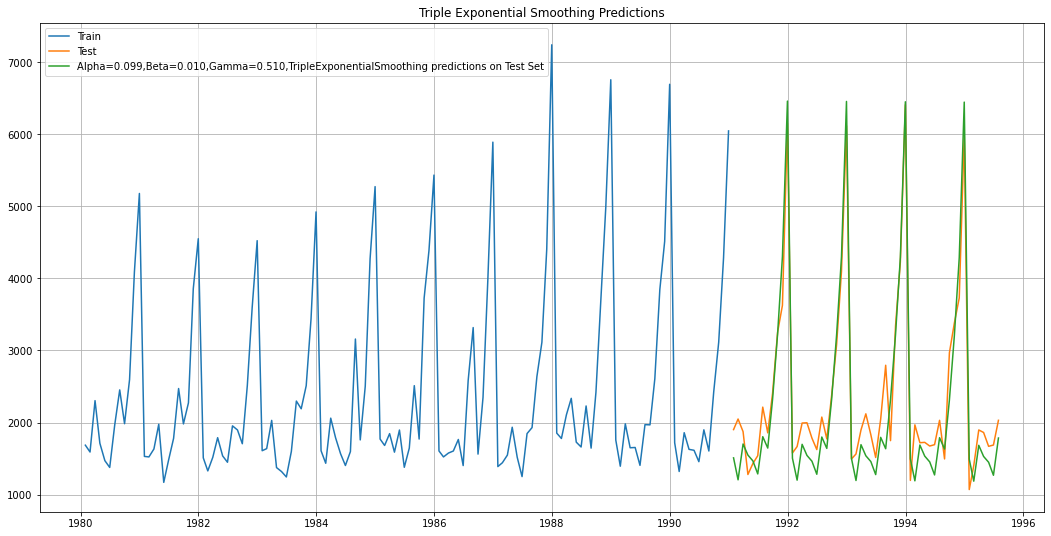

In [87]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.099,Beta=0.010,Gamma=0.510,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions');

#### Model EvaluationTriple Exponential Smoothing

In [88]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.099,Beta=0.010,Gamma=0.510 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.099,Beta=0.010,Gamma=0.510 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 379.982


In [89]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.099,Beta=0.010,Gamma=0.510,TripleExponentialSmoothing'])

resultsDf_7

,Test RMSE
"Alpha=0.099,Beta=0.010,Gamma=0.510,TripleExponentialSmoothing",379.981727


## Triple Exponential Smoothing (Holt - Winter's Model) - Trend - Additive, Seasonality - Multiplicative

#### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [90]:
TES_train_1 = train.copy()
TES_test_1 = test.copy()

In [91]:
model_TES_1 = ExponentialSmoothing(TES_train_1['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [92]:
model_TES_1_autofit = model_TES_1.fit()

In [93]:
model_TES_1_autofit.params

{'smoothing_level': 0.11111178654622239,
 'smoothing_trend': 0.04936740573024747,
 'smoothing_seasonal': 0.3623361038949768,
 'damping_trend': nan,
 'initial_level': 2356.4788422674987,
 'initial_trend': -9.816747345814935,
 'initial_seasons': array([0.71237643, 0.68509259, 0.9058638 , 0.80647176, 0.65676719,
        0.6546523 , 0.88613424, 1.13347103, 0.91926922, 1.21182779,
        1.8712307 , 2.37642084]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
TES_test_1['auto_predict'] = model_TES_1_autofit.forecast(steps=len(test))
TES_test_1.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1587.768816
1991-02-28,2049,1356.585021
1991-03-31,1874,1763.217947
1991-04-30,1279,1656.421833
1991-05-31,1432,1542.281106


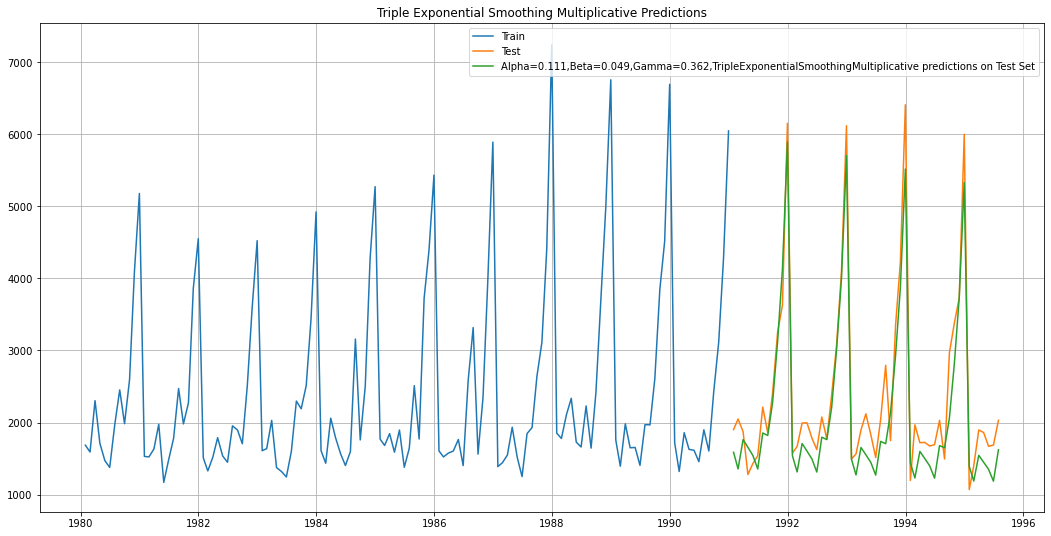

In [95]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_1['Sparkling'], label='Train')
plt.plot(TES_test_1['Sparkling'], label='Test')

plt.plot(TES_test_1['auto_predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothingMultiplicative predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Multiplicative Predictions');

#### Model EvaluationTriple Exponential Smoothing Multiplicative

In [96]:
## Test Data

rmse_model8_test_1 = metrics.mean_squared_error(TES_test_1['Sparkling'],TES_test_1['auto_predict'],squared=False)
print("Alpha=0.111,Beta=0.049,Gamma=0.362 Triple Exponential Smoothing Multiplicative Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model8_test_1))

Alpha=0.111,Beta=0.049,Gamma=0.362 Triple Exponential Smoothing Multiplicative Model forecast on the Test Data, RMSE is 403.320


In [97]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_model8_test_1]}
                           ,index=['Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothingMultiplicative'])

resultsDf_8

,Test RMSE
"Alpha=0.111,Beta=0.049,Gamma=0.362,TripleExponentialSmoothingMultiplicative",403.319631


# 1.4 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## H0 = Time Series is not Stationary
## HA = Time Series is Stationary

In [98]:
from statsmodels.tsa.stattools import adfuller

In [99]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



We observe the Time Series is non-stationary for alpha = 0.05 as the p-value is > alpha at 0.60 . Hence, we fail to reject the null hypothesis.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

In [100]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df.diff().dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



We observe the Time Series is now stationary for alpha = 0.05 as the p-value at less than alpha. 

# 1.5 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Arima Model

In [101]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [102]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [103]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918473
ARIMA(0, 1, 2) - AIC:2234.4083231282916
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946777883
ARIMA(1, 1, 2) - AIC:2234.527200452076
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262167617
ARIMA(2, 1, 2) - AIC:2213.509212507062


In [104]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509213
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [105]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 06 Mar 2022   AIC                           2213.509
Time:                        15:28:41   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

#### Predict on the Test Set using this model and evaluate the model.

In [106]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))


In [107]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9798316621514


In [109]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_9

,Test RMSE
"ARIMA(2,1,2)",1299.979832


## Sarima Model with Seasonality 6

In [110]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [111]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [112]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076171631
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.635553689147
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844430662
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111229876
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751069
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.917780566193
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082793
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.18763395401
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5732428785636
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429813841
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274341191
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103987035
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7717933251297
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6414775362275
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1908.3347839352996
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2108.564551026982
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1987.147698865012
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1838.975595458151
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1773.4229389343343
SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1775.258400254448
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1727.6708655540572
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:2145.3576991201085
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1945.156142608302
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2124.90717863182
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2054.1700712291704
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1915.633692251132
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1782.7357821012044
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1782.3598160204858
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1760.3426710444842
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:2199.858613145455
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2103.0859058222904
SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:190

In [113]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.670866
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.888818
80,"(2, 1, 2)","(2, 0, 2, 6)",1729.192582
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.641478
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379778


In [114]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 06 Mar 2022   AIC                           1727.671
Time:                                   15:32:47   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6451      0.286     -2.256      0.024      -1.206      -0.085
ma.L1         -0.3355      0.227     -1.475

#### Predict on the Test Set using this model and evaluate the model.

In [115]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [116]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1330.347607,380.569348,584.445390,2076.249823
1,1177.284748,392.119860,408.743945,1945.825551
2,1625.868709,392.314443,856.946530,2394.790887
3,1546.370547,397.718345,766.856914,2325.884179
4,1308.633296,398.937917,526.729347,2090.537244


In [117]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

626.898232625206


In [118]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)(2,0,2,6)'])

resultsDf_10

,Test RMSE
"SARIMA(1, 1, 2)(2,0,2,6)",626.898233


## Sarima Model with Seasonality 12

In [119]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [120]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [121]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845235
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235916
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389947
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791878
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158602903
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920795
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566528
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572892257
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183879
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193786773
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319654622398
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954174845
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.22450939983
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824628909
SARIMA(0, 1, 

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191733294065
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145455
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495422416
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080334736
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.823429067091
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091125280635
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888302467562
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060897595
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.159585016411
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428632283253
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681146070703
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372609929569
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523433538604
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931244946
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086050916356
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404024601964
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.0455911409174
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476006564168
SARIMA(2, 1, 2

In [122]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.929659
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [123]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 06 Mar 2022   AIC                           1555.584
Time:                                    15:34:49   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

#### Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [125]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.386418,388.344800,566.244597,2088.528239
1,1315.110768,402.007729,527.190097,2103.031440
2,1621.588857,402.001336,833.680717,2409.496997
3,1598.867465,407.239037,800.693619,2397.041311
4,1392.688227,407.969106,593.083472,2192.292982


In [126]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

528.6213088960798


In [127]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)(1, 0, 2, 12)'])

resultsDf_11

,Test RMSE
"SARIMA(1, 1, 2)(1, 0, 2, 12)",528.621309


# 1.6 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Arima Model based on cut-offs of ACF and PACF

In [128]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

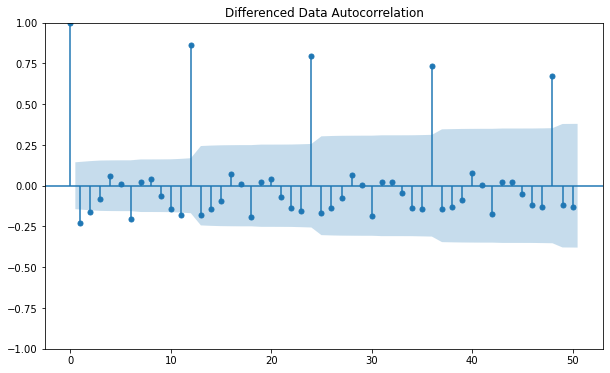

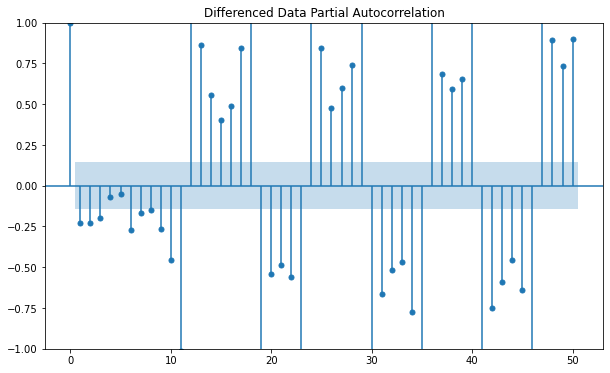

In [129]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.


In [130]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.378
Date:                Sun, 06 Mar 2022   AIC                           2230.756
Time:                        15:36:14   BIC                           2248.007
Sample:                    01-31-1980   HQIC                          2237.766
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4323      0.044     -9.794      0.000      -0.519      -0.346
ar.L2          0.3303      0.109      3.021      0.003       0.116       0.545
ar.L3         -0.2374      0.065     -3.639      0.0

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [131]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [132]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print(rmse)

1281.4820773534598


In [133]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])

resultsDf_12

,Test RMSE
"ARIMA(3,1,2)",1281.482077


## Sarima Model based on cut-offs of ACF and PACF

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

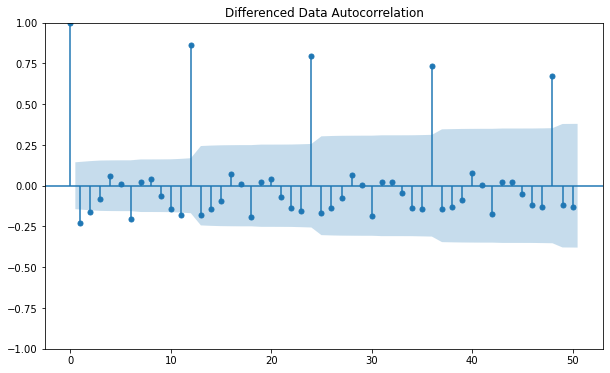

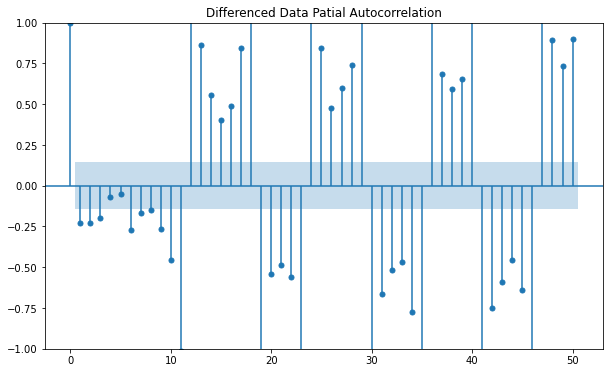

In [134]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality for 12.

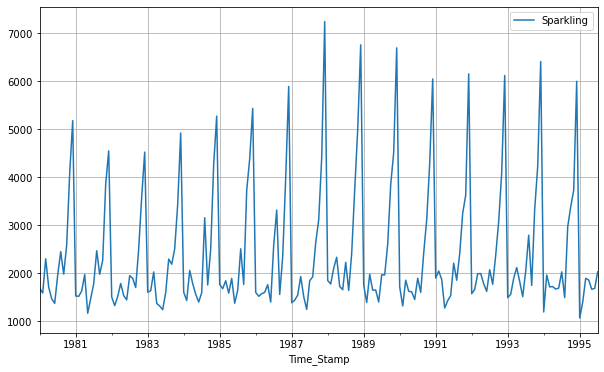

In [135]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

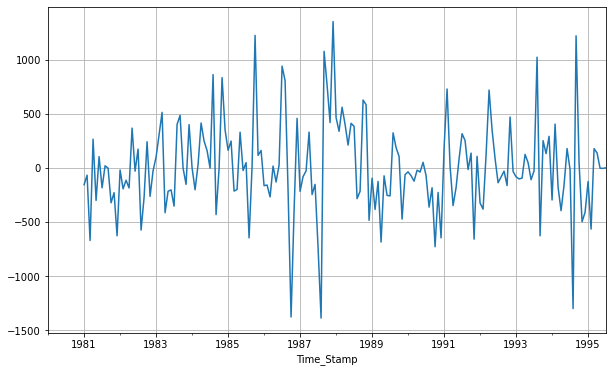

In [136]:
df['Sparkling'].diff(12).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

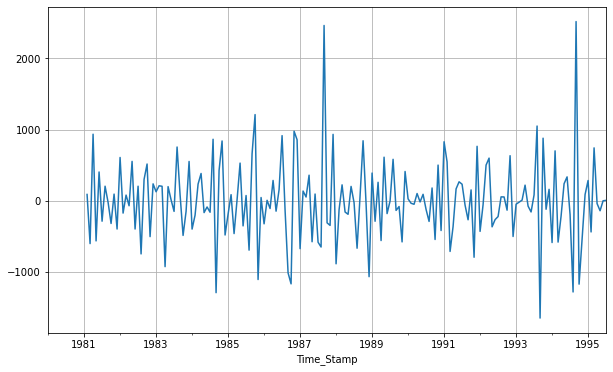

In [137]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Checking the ACF and the PACF plots for the new modified Time Series with Stationarity.

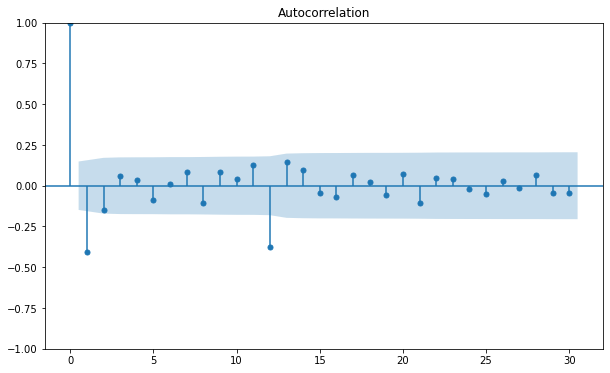

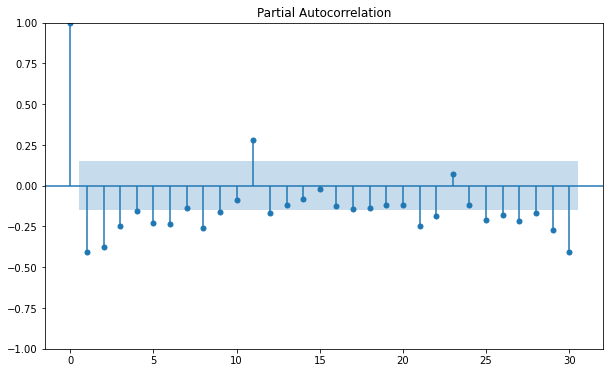

In [138]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);  

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 6.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.


In [139]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(6, 1, [1], 12)   Log Likelihood                -323.675
Date:                              Sun, 06 Mar 2022   AIC                            673.349
Time:                                      15:48:00   BIC                            696.543
Sample:                                           0   HQIC                           681.951
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5243      0.236     -2.217      0.027      -0.988      -0.061
ar.L2          0.31

In [140]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [141]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1416.434911,359.390446,712.042580,2120.827241
1,1566.580697,393.811151,794.725026,2338.436369
2,1728.591852,394.330094,955.719069,2501.464635
3,1657.547915,426.835267,820.966163,2494.129666
4,1670.469879,425.908252,835.705046,2505.234713


In [142]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

369.6774134190142


In [145]:
resultsDf= pd.concat([resultsDf,resultsDf_2,resultsDf_3,resultsDf_4,resultsDf_5,resultsDf_6,resultsDf_7,resultsDf_8,resultsDf_9,resultsDf_10,resultsDf_11,resultsDf_12],axis=0)
resultsDf

,Test RMSE
RegressionOnTime,1389.135175
"SARIMA(3,1,2)(6,1,1,12)",369.677413
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
12pointTrailingMovingAverage,1267.925330
"Alpha=0.05,SimpleExponentialSmoothing",1316.034674


# 1.8 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Building Full Model on the best optimum model of SARIMA(3,1,2)(6,1,1,12)

In [146]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(6, 1, [1], 12)   Log Likelihood                -728.128
Date:                              Sun, 06 Mar 2022   AIC                           1482.255
Time:                                      16:24:43   BIC                           1515.992
Sample:                                  01-31-1980   HQIC                          1495.905
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8419      0.138     -6.084      0.000      -1.113      -0.571
ar.L2          0.13

#### Model EvaluationTriple Exponential Smoothing (Full Model)

In [147]:
predicted_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [148]:
predicted_SARIMA_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1670.837412,373.926389,937.955158,2403.719667
1995-09-30,2585.710558,380.056472,1840.813560,3330.607556
1995-10-31,3274.133458,380.648957,2528.075211,4020.191705
1995-11-30,4025.299179,383.803351,3273.058433,4777.539924
1995-12-31,6013.424308,383.839762,5261.112198,6765.736417


In [149]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 626.0830066730352


In [151]:
predicted_SARIMA_full_data_date = predicted_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08',end='1996-08', freq='M'))

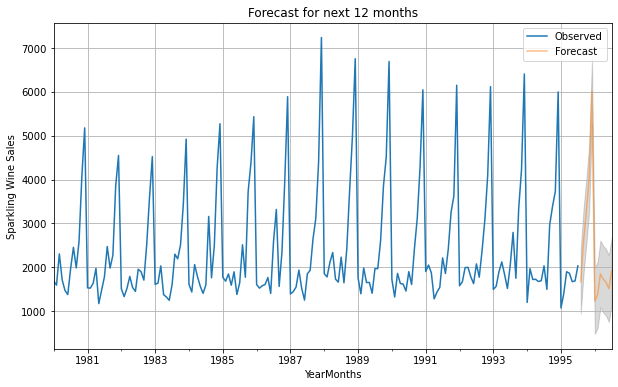

In [153]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
predicted_SARIMA_full_data_date['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_SARIMA_full_data_date.index, predicted_SARIMA_full_data_date['mean_ci_lower'], 
                  predicted_SARIMA_full_data_date['mean_ci_upper'], color='k', alpha=.15)

axis.set_xlabel('YearMonths')
axis.set_ylabel('Sparkling Wine Sales')
plt.title('Forecast for next 12 months')
plt.legend(loc='best')
plt.grid()
plt.show()

In [154]:
resultsDf_14 = pd.DataFrame({'RMSE Full Model': [rmse]}
                           ,index=['SARIMA(3,1,2)(6,1,1,12), Full Model'])


resultsDf_14

,RMSE Full Model
"SARIMA(3,1,2)(6,1,1,12), Full Model",626.083007


# THE END